## 目录:
* XOR问题逻辑回归
* XOR问题神经网络

# XOR问题
异或（xor）是一个数学运算符。它应用于逻辑运算。异或的数学符号为“⊕”，计算机符号为“xor”。其运算法则为：**如果a、b两个值不相同，则异或结果为1。如果a、b两个值相同，异或结果为0。**

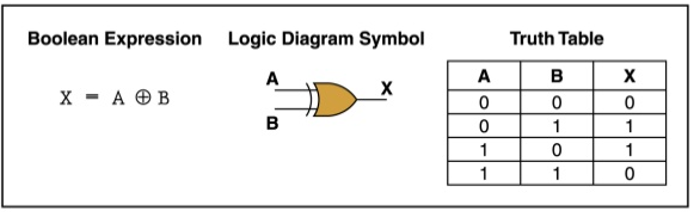

**以下建模使用A、B为自变量，X为因变量。**

# 逻辑回归
尝试用逻辑回归解决异或问题，迭代一万次准确率只有50%，单个逻辑回归单元无法解决异或问题。

In [3]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
   # Initialize TensorFlow variables
   sess.run(tf.global_variables_initializer())

   for step in range(10001):
       sess.run(train, feed_dict={X: x_data, Y: y_data})
       if step % 2000 == 0:
           print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

   # Accuracy report
   h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.984932 [[ 0.47442749]
 [ 1.00204253]] [ 0.79612714]
2000 0.693147 [[  6.30361174e-05]
 [  6.50144793e-05]] [ -7.59510222e-05]
4000 0.693147 [[  1.33832401e-07]
 [  1.33341160e-07]] [ -1.78630700e-07]
6000 0.693147 [[  1.33832401e-07]
 [  1.33341160e-07]] [ -1.78630700e-07]
8000 0.693147 [[  1.33832401e-07]
 [  1.33341160e-07]] [ -1.78630700e-07]
10000 0.693147 [[  1.33832401e-07]
 [  1.33341160e-07]] [ -1.78630700e-07]

Hypothesis:  [[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]] 
Correct:  [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] 
Accuracy:  0.5


# 神经网络
下图简要介绍了神经网络的运算过程：


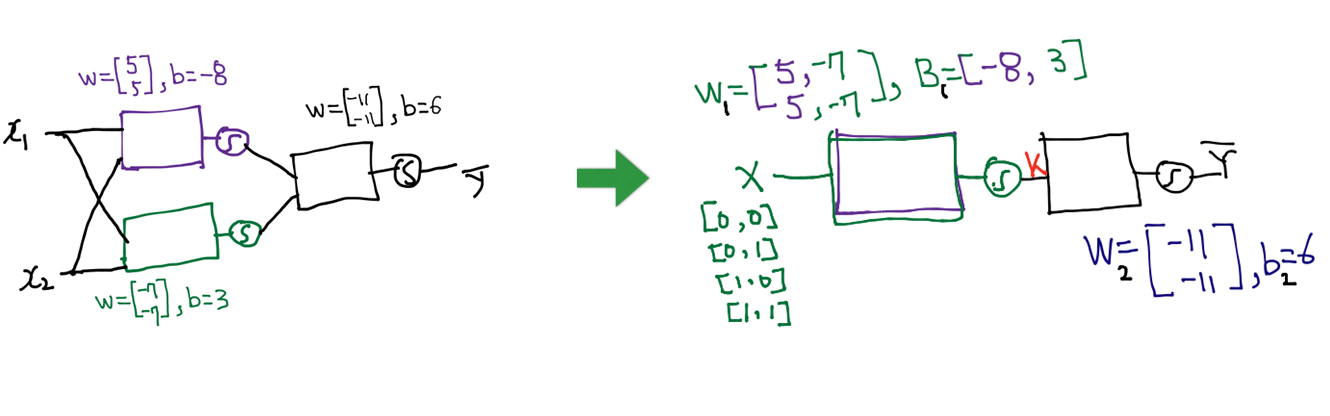

下面是神经网络解决异或问题的代码，异或问题是十分经典的任务，我们可以从该问题中理解神经网络的强大之处：

In [1]:
import tensorflow as tf
import numpy as np

#2维，4个样本
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

#将第一层sigmoid输出的概率作为第二层的输入
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
# Launch graph
with tf.Session() as sess:
   # Initialize TensorFlow variables
   sess.run(tf.global_variables_initializer())
   for step in range(10001):
       sess.run(train, feed_dict={X: x_data, Y: y_data})
       if step % 2000 == 0:
           print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))

   # Accuracy report
   h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.708169 [array([[ 1.04908574,  0.69858229],
       [-0.5031116 ,  0.54828715]], dtype=float32), array([[-0.67605484],
       [ 0.48400369]], dtype=float32)]
2000 0.570794 [array([[ 1.27024877,  2.92188311],
       [ 0.42346942,  2.78167486]], dtype=float32), array([[-1.40783143],
       [ 2.76077509]], dtype=float32)]
4000 0.109356 [array([[ 3.18376946,  5.34263134],
       [ 3.1734159 ,  5.28089094]], dtype=float32), array([[-6.64127874],
       [ 6.54139042]], dtype=float32)]
6000 0.0375826 [array([[ 4.09235859,  5.99393606],
       [ 4.08673096,  5.96269703]], dtype=float32), array([[-8.8241806 ],
       [ 8.28462791]], dtype=float32)]
8000 0.0217952 [array([[ 4.48239517,  6.3077426 ],
       [ 4.47814608,  6.28532743]], dtype=float32), array([[-9.86877728],
       [ 9.22021103]], dtype=float32)]
10000 0.0151938 [array([[ 4.72097683,  6.50908518],
       [ 4.71745872,  6.4909873 ]], dtype=float32), array([[-10.54761887],
       [  9.8538475 ]], dtype=float32)]

Hypothesis:  [[ 0.